# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [28]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

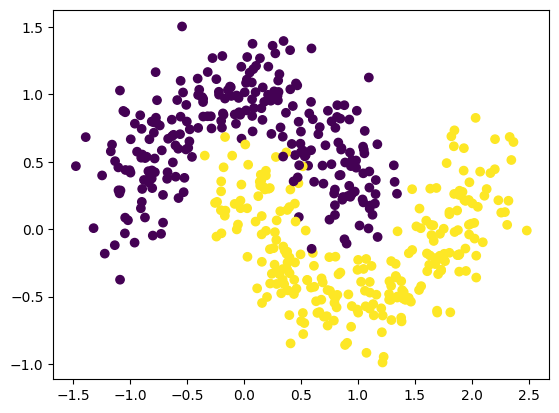

In [29]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

Переопределим для удобства

In [30]:
X, y = moons_points, moons_labels

Функция для изображение разделения на классы

In [61]:
def plot_decisions(X, y, model, transformer=None, title=None, h=0.02):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]

    if transformer is not None:
        grid = transformer.transform(grid)

    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    if title:
        plt.title(title)
    plt.show()



Обучение линейной регрессии

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(
    C=1.0,
    solver="lbfgs",
    max_iter=1000
)

lr.fit(X, y)
accuracy_score(y, lr.predict(X))

0.856

In [33]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')

svm.fit(X, y)
accuracy_score(y, svm.predict(X))

0.858

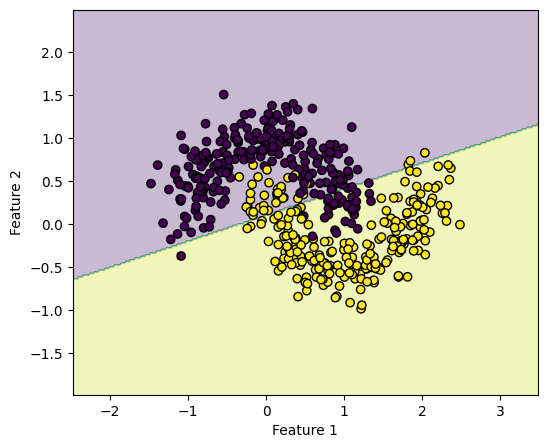

In [34]:
plot_decisions(X, y, lr)

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

### Poly

$$K(x, x') = (\gamma<x, x'> + r)^d$$

То есть тут мы как раз можем подбирать степень, в которую будем возводить скалярное произведение

SVM poly degree = 1, accuracy = 0.86


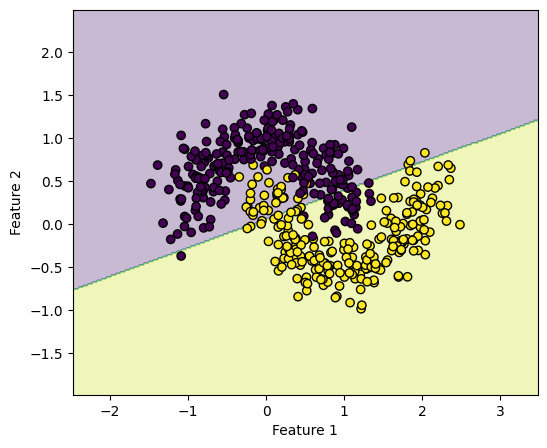

SVM poly degree = 2, accuracy = 0.752


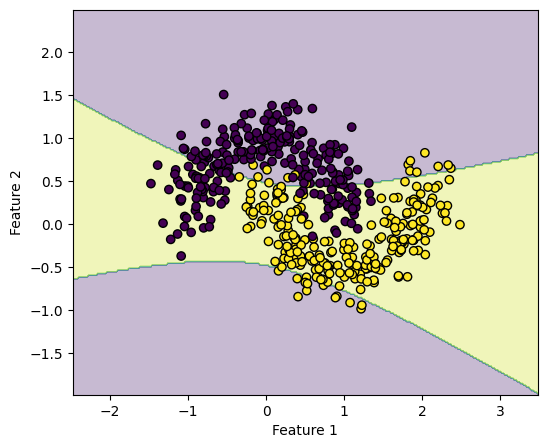

SVM poly degree = 3, accuracy = 0.906


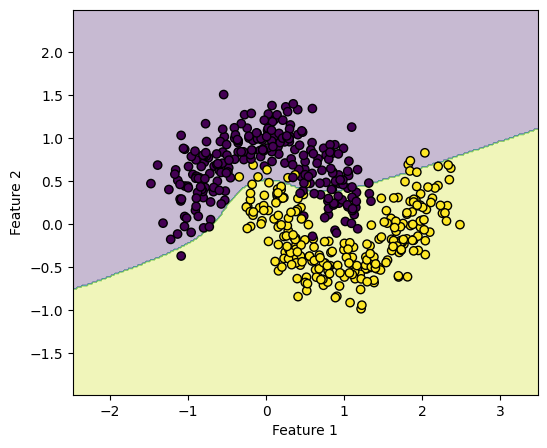

SVM poly degree = 4, accuracy = 0.692


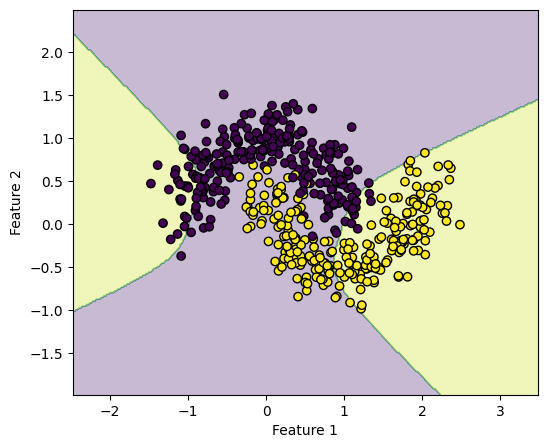

In [39]:
for degree in [1, 2, 3, 4]:
    svm = SVC(
        kernel='poly',
        degree=degree
    )

    svm.fit(X, y)
    print(f"SVM poly degree = {degree}, accuracy = {accuracy_score(y, svm.predict(X))}")
    plot_decisions(X, y, svm)

### RBF

$$K(x, x') = \exp(\gamma||x - x'||^2)$$

SVM rbf gamma = 0.1, accuracy = 0.87


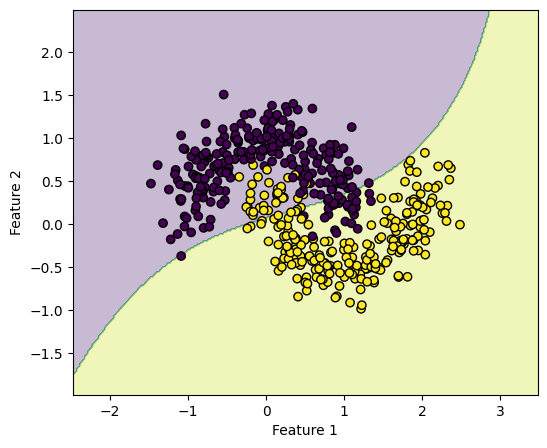

SVM rbf gamma = 0.5, accuracy = 0.968


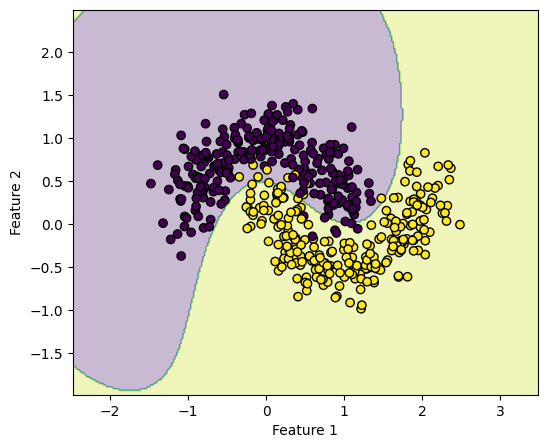

SVM rbf gamma = 1.0, accuracy = 0.976


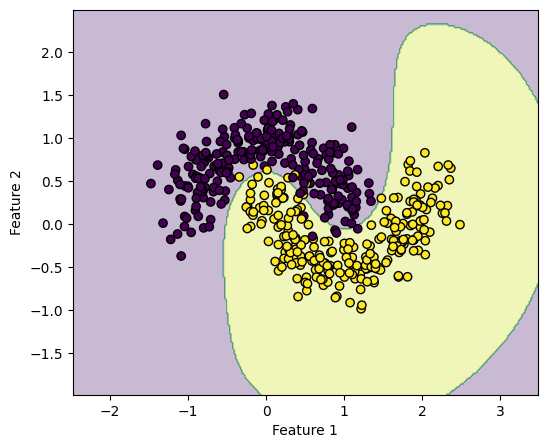

SVM rbf gamma = 10.0, accuracy = 0.982


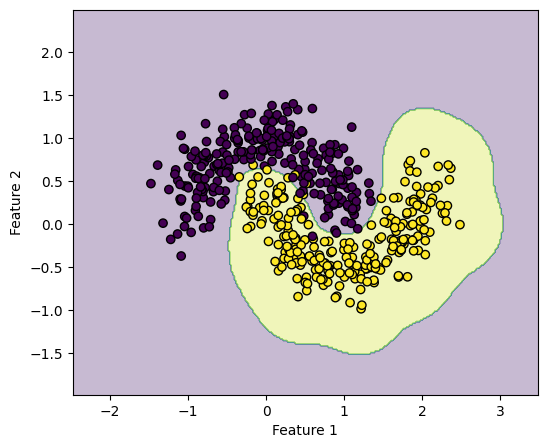

In [45]:
for gamma in [0.1, 0.5, 1.0, 10.0]:
    svm = SVC(
        kernel='rbf',
        gamma=gamma
    )

    svm.fit(X, y)
    print(f"SVM rbf gamma = {gamma}, accuracy = {accuracy_score(y, svm.predict(X))}")
    plot_decisions(X, y, svm)

### Sigmoid

$$K(x, x') = th(\gamma (x, x') - r)$$

0.648


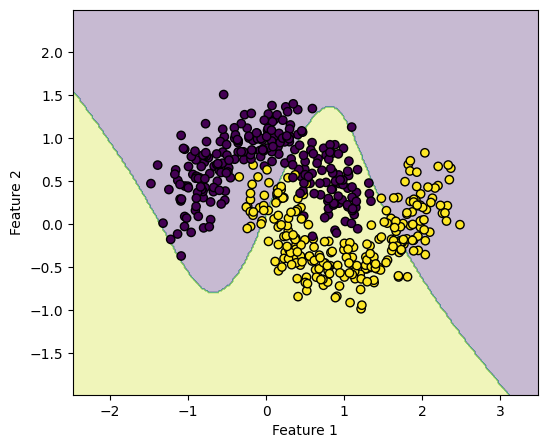

In [46]:
svm = SVC(
    kernel='sigmoid',
)

svm.fit(X, y)
print(accuracy_score(y, svm.predict(X)))
plot_decisions(X, y, svm)

В итоге, лучше всего себя показывает ядро радиальной базисной функции(RBF), причем больше gamma тем больше модель переобучается под тренировочную выборку - это видно из разделяющих плоскостей.

Также для данной задачи хорошо подходит полиномиальное ядро степени 3.

В данной задании разделение на трейн и тест не делал, так как ориентировался на разделяющие плоскости, по которым понятно переобучается ли модель или нет и каким вообще образом модель разделяет классы.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [62]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(degree=3)
X_new = transformer.fit_transform(X)

lr = LogisticRegression(
    C=1.0,
    solver="lbfgs",
    max_iter=1000
)

lr.fit(X_new, y)
accuracy_score(y, lr.predict(X_new))

0.968

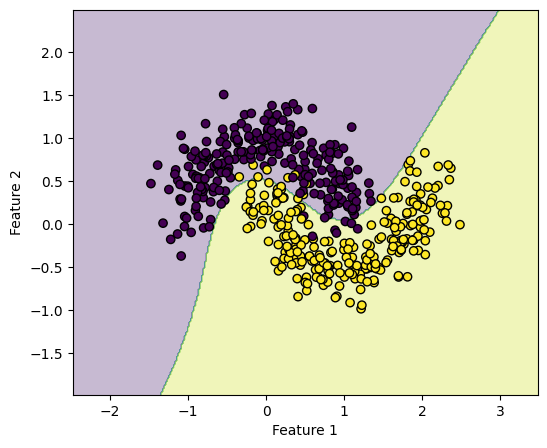

In [63]:
plot_decisions(
    X=X,
    y=y,
    model=lr,
    transformer=transformer
)

Таким образом, получилось добиться хорошего качества используя обычную логистическую регресию, но с новыми сгенерированными фичами. В данном случае помогли фичи возведенные в третью степень.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

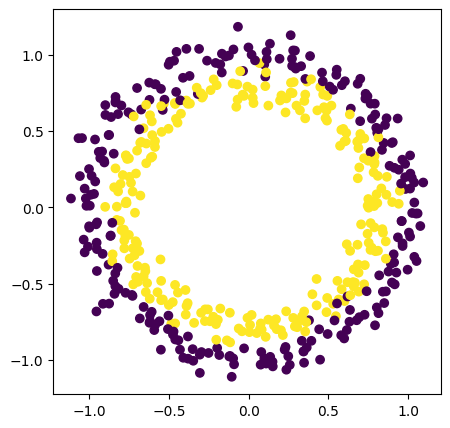

In [64]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

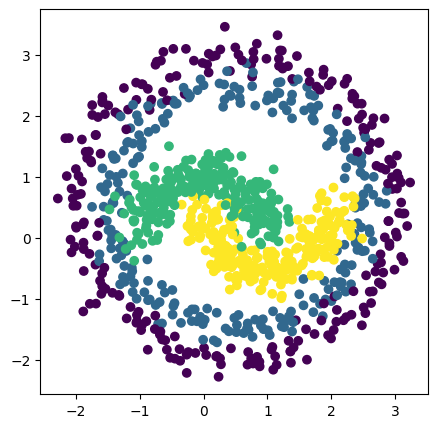

In [65]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

### Circles

#### Logistic Regression

In [67]:
X, y = circles_points, circles_labels

Accuracy:  0.498


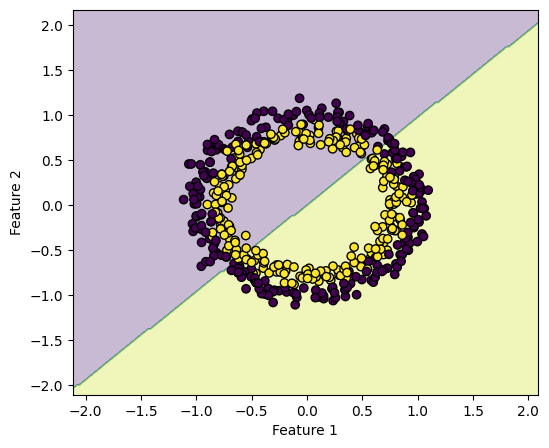

In [75]:
lr = LogisticRegression(
    C=1.0,
    solver="lbfgs",
    max_iter=1000
)

lr.fit(X, y)
print("Accuracy: ", accuracy_score(y, lr.predict(X)))
plot_decisions(
    X=X,
    y=y,
    model=lr,
)

В этом случае хорошей фичей будет радиус, то есть $\sqrt{x_1^2 + x_2^2}$

In [82]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import FeatureUnion

radius_transformer = FunctionTransformer(
    lambda X: np.sqrt(np.square(X[:, 0]) + np.square(X[:, 1])).reshape(-1, 1)
)

features = FeatureUnion([
    ("identity", FunctionTransformer(lambda X: X)),
    ("radius", radius_transformer)
])

X_new = features.transform(X)

Accuracy:  0.938


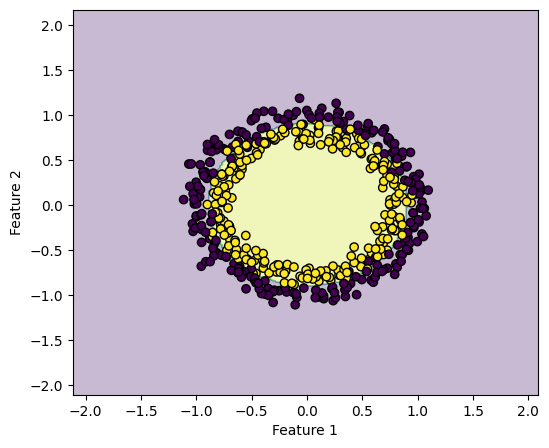

In [84]:
lr = LogisticRegression(
    C=1.0,
    solver="lbfgs",
    max_iter=1000
)

lr.fit(X_new, y)
print("Accuracy: ", accuracy_score(y, lr.predict(X_new)))
plot_decisions(
    X=X,
    y=y,
    model=lr,
    transformer=features
)

#### SVM

В данном случае исходя из распределения признаков выберем rbf

Accuracy:  0.932


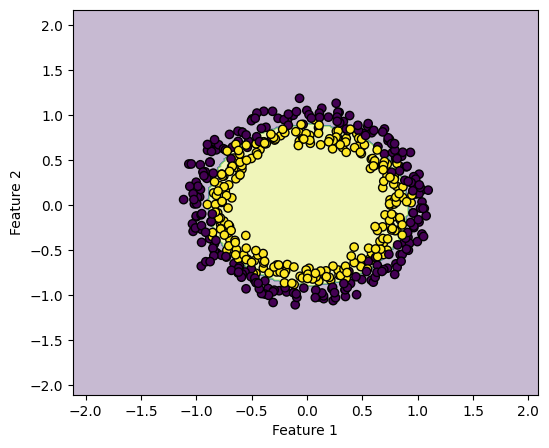

In [88]:
svm = SVC(
    kernel='rbf',
    gamma=1.0
)

svm.fit(X, y)
print("Accuracy: ", accuracy_score(y, svm.predict(X)))
plot_decisions(X, y, svm)

### Circles + moon

#### Logistic Regression

In [93]:
X, y = points, labels

Комбинируем фичи из прошлых примеров: полиномиальный 3-ей степени + радиус

In [97]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

radius = FunctionTransformer(
    lambda X: np.sqrt(X[:, 0]**2 + X[:, 1]**2).reshape(-1, 1),
    validate=False
)

base_features = ColumnTransformer(
    transformers=[
        ("orig", "passthrough", [0, 1]),
        ("radius", radius, [0, 1])
    ]
)

feature_transformer = Pipeline([
    ("base", base_features),
    ("poly", PolynomialFeatures(degree=3, include_bias=False))
])

In [99]:
X_new = feature_transformer.fit_transform(X)

Accuracy:  0.938


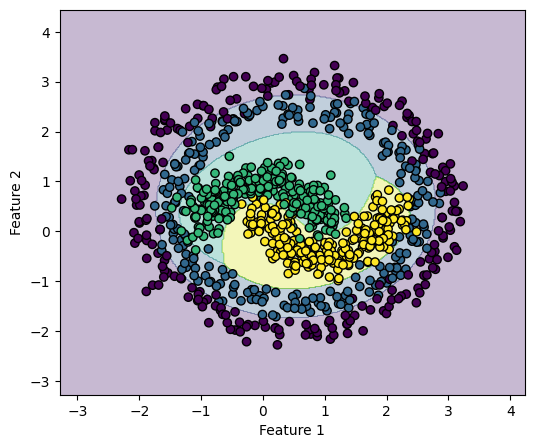

In [101]:
lr = LogisticRegression(
    C=1.0,
    solver="lbfgs",
    max_iter=1000
)

lr.fit(X_new, y)
print("Accuracy: ", accuracy_score(y, lr.predict(X_new)))
plot_decisions(
    X=X,
    y=y,
    model=lr,
    transformer=feature_transformer
)

#### SVM

Accuracy:  0.935


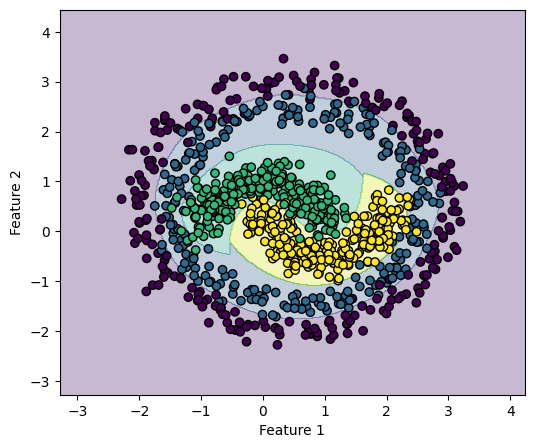

In [102]:
svm = SVC(
    kernel='rbf',
    gamma=1.0
)

svm.fit(X, y)
print("Accuracy: ", accuracy_score(y, svm.predict(X)))
plot_decisions(X, y, svm)

Таким образом, даже сложные зависимости можно предсказывать при помощи таких "простых" моделей как логистическая регрессия и метод опорных векторов. В случае логистической регрессии помогает смотреть на распределение признаков и генерировать новые фичи, а в случае метода опорных векторов помогает большой набор различных нелинейных ядер.